# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2022/)    
## 1MS041, 2022 
&copy;2022 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Linear Congruential Generators, and Pseudo-Random Numbers

## What's this all about?

### Question: 

How can we produce realisations from Uniform$(0,1)$, the **fundamental random variable**?

i.e., how can we produce samples $(x_1, x_2, \ldots, x_n)$ from $X_1, X_2, \ldots, X_n$ $\overset{IID}{\thicksim}$ Uniform$(0,1)$?

What is python doing when we ask for `random()`?

## Linear Congruential Generators

A linear congruential generator (LCG) is a simple *pseudo-random number generator (PRNG)* - a simple way of imitating samples or realizations from the Uniform$(0,1)$.  

"Pseudo-random" means that the numbers are not really random [From Ancient Greek pseudo means “false, lying”)].

We will look at what we mean by that as we find out about linear congruential generators. 

The theory behind LCGs is easy to understand, and they are easily implemented and fast.

To make a LCG we need:

- a modulus $m$ ($m > 0$)
- an integer multiplier $a$ ($0 \le a < m$)
- an integer increment $c$ ($0 \le c < m$)
- an integer seed $x_0$ ($0 \le x_0 < m$)
- an integer sequence length $n$

Using these inputs, the LCG generates numbers $x_1, x_2, \ldots x_{n-1} $ where $x_{i+1}$ is calculated from $x_i$ as defined by the following recurrence relation:

$$x_{i+1} \gets mod \left(a x_i + c , m \right)$$

In the above expression $\gets$ denotes "gets" as in variable assignment.

$x_0,x_1,\ldots,x_{n-1}$ is the sequence of pseudo-random numbers called the linear congruential sequence.



We can define a function parameterised by $(m,a,c,x_0,n)$ to give us a linear congruential sequence in the form of a list. 

(Remember about function parameters?  The function **parameters** here are `m`, `a`, `c`, `x0`, and `n`.  Note that the **return value** of the function is a list.  

### Implementing the LCG

Let's see how we can define a function for our LCG next.'

In [1]:
def linConGen(m, a, b, x0, n):
    '''A linear congruential sequence generator.
    
    Param m is the integer modulus to use in the generator.
    Param a is the integer multiplier.
    Param b is the integer increment.
    Param x0 is the integer seed.
    Param n is the integer number of desired pseudo-random numbers.
    
    Returns a list of n pseudo-random integer modulo m numbers.'''
    
    x = x0 # the seed
    retValue = [x % m]  # start the list with x=x0
    for i in range(2, n+1, 1):
        x = (a * x + b) % m # the generator, using modular arithmetic
        retValue.append(x) # append the new x to the list
    return retValue

The function is merely implementing the pseudocode or algorithm of the linear congruential generator using a for-loop and modular arithmetic:  note that the generator produces integers modulo $m$.

### Linear Congruential Generators:  the Good, the Bad, and the Ugly

Are all linear congruential generators as good as each other?  What makes a good LCG?

One desirable property of a LCG is to have the longest possible period.   

The **period** is the length of sequence we can get before we get a repeat.  The longest possible period a LCG can have is $m$.  Lets look at an example.  

We want an LCG with a **full period** of $m$ so that we can use it with any seed and not get stuck at fixed points or short periodic sequences. This is a minimal requirement for simulation purposes that we will employ such sequences for.  Is there anyway to know what makes a LCG with a full period?  

It turns out that an LCG will have a full period if and only if:

- $b$ and $m$ are relatively prime or coprime.  i.e. the **greatest common divisor (gcd)** of $b$ and $m$ is $1$; and
- $a-1$ is divisible by all **prime factors** of $m$; and
- $a-1$ is a multiple of 4 if $m$ is a multiple of 4.

(Different conditions apply when $c=0$.  The Proposition and Proof for this are in Knuth, The Art of Computer Programming, vol. 2, section 3.3).

Python has a function `gcd` which can calculate the greatest common divisor of two numbers:

In [2]:
m = 2**8

In [3]:
from math import gcd
b = 101
gcd(101,m)

1

In [4]:
from sympy.ntheory import primefactors as prime_factors
prime_factors(m)

[2]

In [5]:
k=5
a = k*4+1

In [6]:
prime_factors(a-1)

[2, 5]

In [7]:
(a-1) % 4

0

In [8]:
ourLCG = linConGen(m,a,b,1,256+1)
len(set(ourLCG))

256

Python can also help us to calculate **prime factors** with the `prime_factors` function:

In [9]:
from sympy.ntheory import primefactors as prime_factors

In [10]:
prime_factors(m)

[2]

In [11]:
prime_factors(7634887623876428376482746)

[2, 25504980841, 149674443424853]

$(m, a, c, x0, n) = (256, 137, 123, 13, 256)$ gives a linear congruential sequence with the longest possible period of 256.  Let us see how these parameters satisfy the above three requirements while those earlier with $m=17$, $a=2$, and $c=7$ do not.

In [12]:
(m,a,c,x0,n)=(256, 137, 123, 13, 256) # faster way to assign a bunch of parameters

In [13]:
gcd(c,m)         # checking if the greatest common divisor of c and m is indeed 1

1

In [14]:
prime_factors(m)   # it is easy to get a list of all the prime factors of m

[2]

In [15]:
(a-1) % 2             # checking if a-1=136 is divisible by 2, the only prime factors of m

0

In [16]:
[ (a-1)%x for x in prime_factors(m) ]  
# a list comprehension check for an m with more prime factors

[0]

In [17]:
m % 4         # m is a multiple of 4 check

0

In [18]:
(a-1) % 4       # if m is a multiple of 4 then a-1 is also a multiple of 4

0

In [19]:
(m, a, c, x0, n)  # therefore these parameter values satisfy all conditions to have maximum period length m

(256, 137, 123, 13, 256)

Thus, the parameters $(m,  a,  c,  x_0,  n) = (256, 137, 123, 13, 256)$  do indeed satisfy the three conditions to guarantee the longest possible period of 256.  

In contrast, for the LCG example earlier with $m=17$, $a=2$, and $c=7$, although $m$ and $c$ are relatively prime, i.e., $gcd(m,c)=1$, we have the violation that $a-1=2-1=1$ is not divisible by the only prime factor $17$ of $m=17$.  Thus, we cannot get a period of maximal length $17$ in that example.

In [20]:
[ (2-1)%x for x in prime_factors(17) ]

[1]

Let us see if the parameters $(m, a, c, x_0, n) = (256, 137, 123, 13, 256)$  that satisfy the three conditions to guarantee the longest possible period of 256 do indeed produce such a sequence:

In [21]:
(m,a,b,x0,n)=(256, 137, 123, 13, 256) # faster way to assign a bunch of parameters
ourLcg = linConGen(m,a,b,x0,n)
print(ourLcg)

[13, 112, 107, 190, 41, 108, 71, 122, 197, 232, 163, 182, 225, 228, 127, 114, 125, 96, 219, 174, 153, 92, 183, 106, 53, 216, 19, 166, 81, 212, 239, 98, 237, 80, 75, 158, 9, 76, 39, 90, 165, 200, 131, 150, 193, 196, 95, 82, 93, 64, 187, 142, 121, 60, 151, 74, 21, 184, 243, 134, 49, 180, 207, 66, 205, 48, 43, 126, 233, 44, 7, 58, 133, 168, 99, 118, 161, 164, 63, 50, 61, 32, 155, 110, 89, 28, 119, 42, 245, 152, 211, 102, 17, 148, 175, 34, 173, 16, 11, 94, 201, 12, 231, 26, 101, 136, 67, 86, 129, 132, 31, 18, 29, 0, 123, 78, 57, 252, 87, 10, 213, 120, 179, 70, 241, 116, 143, 2, 141, 240, 235, 62, 169, 236, 199, 250, 69, 104, 35, 54, 97, 100, 255, 242, 253, 224, 91, 46, 25, 220, 55, 234, 181, 88, 147, 38, 209, 84, 111, 226, 109, 208, 203, 30, 137, 204, 167, 218, 37, 72, 3, 22, 65, 68, 223, 210, 221, 192, 59, 14, 249, 188, 23, 202, 149, 56, 115, 6, 177, 52, 79, 194, 77, 176, 171, 254, 105, 172, 135, 186, 5, 40, 227, 246, 33, 36, 191, 178, 189, 160, 27, 238, 217, 156, 247, 170, 117, 24, 83, 2

In [22]:
S = set(ourLcg)  # sort it in a set to see if it indeed has maximal period of 256
print(len(S))

256


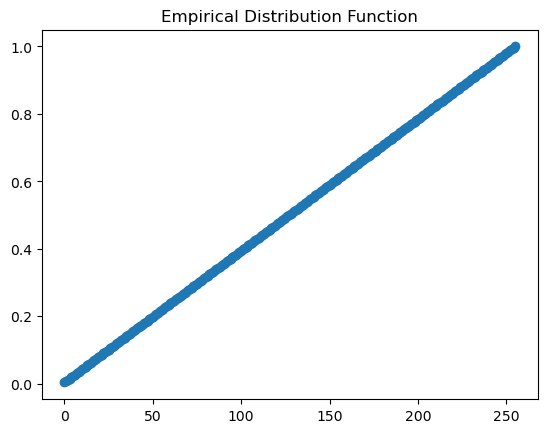

In [23]:
sample = linConGen(m,a,b,x0,256*10)
from Utils import makeEDF
from Utils import plotEDF
plotEDF(makeEDF(sample))

This looks pretty good, it seems to verify that it is indeed a pseudorandom sequence. Lets try to take this modulo $K$, where $M$ is divisible by $K$. For us, $M = 256$ so we can take for instance $K = 8$. Lets see what happens

In [24]:
from math import floor

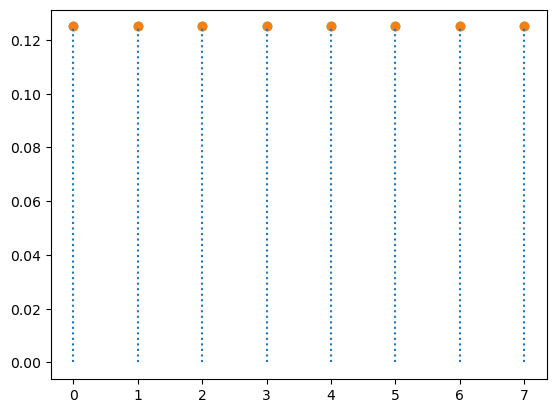

In [25]:
sample_8 = [floor((s / (256))*8) for s in sample]
from Utils import plotEMF, makeEMF
plotEMF(makeEMF(sample_8))

It still retains the pseudo-randomness, but what is the period of the sequence `sample_8`?

In [26]:
for period in range(2,300):
    found = True
    for i in range(period):
        if (sample_8[i] != sample_8[i+period]):
            found = False
            break
    if found == True:
        print(period)
        break

256


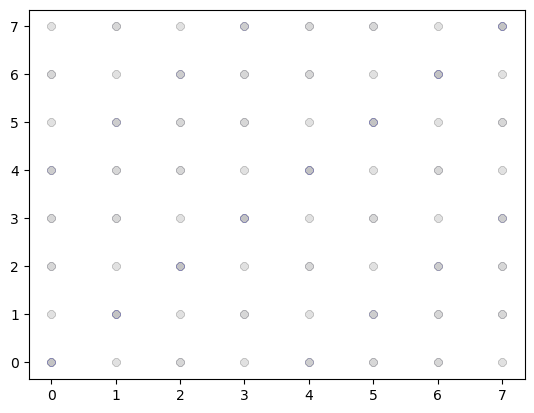

In [27]:
from matplotlib import pyplot as plt
plt.scatter(sample_8[:-1],sample_8[1:],alpha=0.005)

ourLcg is an example of a **good** LCG to some extent, but the plot above tells us that there is some issues. 

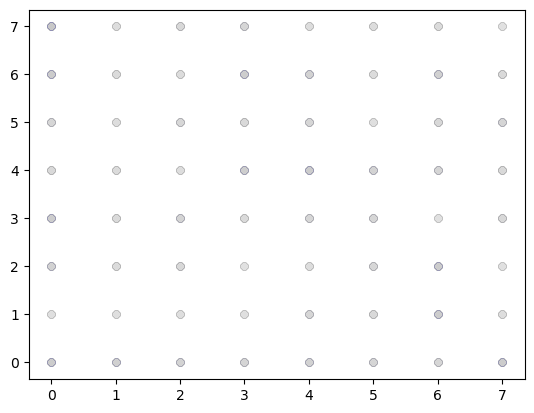

In [28]:
from random import randint
sample_8_python = [randint(0,7) for i in range(256*10)]
plt.scatter(sample_8_python[:-1],sample_8_python[1:],alpha=0.005)

We can see that in section 3.3.4, Table 1, line 5 in The Art of Computer Programming, Knuth is giving an example of a particularly bad LCG.  

When we introducted LCGs, we said that using an LCG was a simple way to imitate independent samples from the Uniform$(0, 1)$ RV, but clearly so far we have been generating sequences of integers.  How does that help?

To get a simple pseudo-random Uniform$(0,1)$ generator, we scale the linear congruential sequence over [0, 1].  We can do this by dividing each element by the largest number in the sequence (256 in the case of `ourLcg`). 

**Important note:** The numbers in the list returned by our `linConGen` function are integers modulo $m$.

In [29]:
ourLcgScaled = [x/256 for x in ourLcg]
print(ourLcgScaled)

[0.05078125, 0.4375, 0.41796875, 0.7421875, 0.16015625, 0.421875, 0.27734375, 0.4765625, 0.76953125, 0.90625, 0.63671875, 0.7109375, 0.87890625, 0.890625, 0.49609375, 0.4453125, 0.48828125, 0.375, 0.85546875, 0.6796875, 0.59765625, 0.359375, 0.71484375, 0.4140625, 0.20703125, 0.84375, 0.07421875, 0.6484375, 0.31640625, 0.828125, 0.93359375, 0.3828125, 0.92578125, 0.3125, 0.29296875, 0.6171875, 0.03515625, 0.296875, 0.15234375, 0.3515625, 0.64453125, 0.78125, 0.51171875, 0.5859375, 0.75390625, 0.765625, 0.37109375, 0.3203125, 0.36328125, 0.25, 0.73046875, 0.5546875, 0.47265625, 0.234375, 0.58984375, 0.2890625, 0.08203125, 0.71875, 0.94921875, 0.5234375, 0.19140625, 0.703125, 0.80859375, 0.2578125, 0.80078125, 0.1875, 0.16796875, 0.4921875, 0.91015625, 0.171875, 0.02734375, 0.2265625, 0.51953125, 0.65625, 0.38671875, 0.4609375, 0.62890625, 0.640625, 0.24609375, 0.1953125, 0.23828125, 0.125, 0.60546875, 0.4296875, 0.34765625, 0.109375, 0.46484375, 0.1640625, 0.95703125, 0.59375, 0.8242187

This is more like it!  We could have a look at this on a plot.  Again again want tuples (index, element in scaled sequence at index position), which we can get using `range(256)` (to get the indexes 0, .., 255) and `zip`:

### Larger LCGs

The above generators are cute but not useful for simulating Lotto draws with 40 outcomes.  Minimally, we need to increase the period length with a larger modulus $m$. 

But remember that the quality of the pseudo-random numbers obtained from a LCG is extremely sensitive to the choice of $m$, $a$, and $c$.  

To illustrate that having a large $m$ alone is not enough we next look at **RANDU**, an infamous LCG which generates sequences with strong correlations between 3 consecutive points, which can been seen if we manipulate the sequence to make 3-dimensional tuples out of groups of 3 consecutive points.  

In the cell below we make our scaled sequence in one step, using a list comprehension which contains the expression to generate the LCG and the scaling.   

In [30]:
from Utils import showURL
showURL('https://en.wikipedia.org/wiki/RANDU')

In [31]:
m, a, c, x0, n = 2147483648, 65539, 0, 1, 5010
RANDU = [x/m for x in linConGen(m, a, c, x0, n)]

Have a look at the results as a histogram:

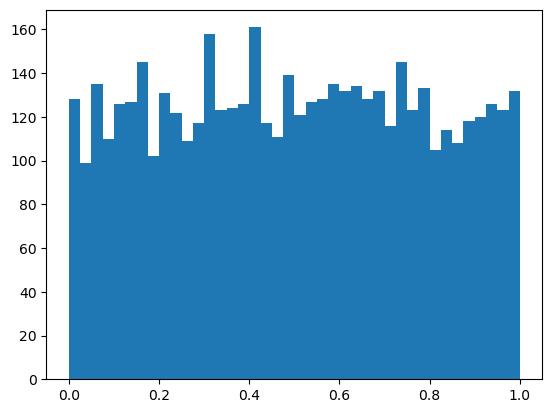

In [32]:
_=plt.hist(RANDU,bins=40)

Now we are going to use some of the array techniques we have learned about to resize the sequence from the RANDU LCG to an array with two columns

In [33]:
import numpy as np
m, a, c, x0, n = 2147483648, 65539, 0, 1, 5010
randu = np.array(linConGen(m, a, c, x0, n))
linConGen(m, a, c, x0, n)

[1,
 65539,
 393225,
 1769499,
 7077969,
 26542323,
 95552217,
 334432395,
 1146624417,
 1722371299,
 14608041,
 1766175739,
 1875647473,
 1800754131,
 366148473,
 1022489195,
 692115265,
 1392739779,
 2127401289,
 229749723,
 1559239569,
 845238963,
 1775695897,
 899541067,
 153401569,
 1414474403,
 663781353,
 1989836731,
 1670020913,
 701529491,
 2063890617,
 1774610987,
 662584961,
 888912771,
 1517695625,
 1105958811,
 1566426833,
 1592415347,
 1899101529,
 1357838347,
 1792534561,
 682145891,
 844966185,
 1077967739,
 1010594417,
 656824147,
 1288046073,
 1816859115,
 1456223681,
 975544643,
 1337189321,
 1390717787,
 604570129,
 1848378931,
 1354175129,
 79574987,
 1174775649,
 2037511715,
 1652089449,
 164865851,
 1152775601,
 1137893651,
 747348793,
 685500843,
 1681833217,
 1774008067,
 1950000393,
 28897051,
 1950731601,
 706897907,
 1717188569,
 1793566603,
 1749153441,
 795272163,
 1914153897,
 32506619,
 147523825,
 592583379,
 80302201,
 1591013739,
 233428033,
 21138300

In [34]:
randu.shape

(5010,)

In [35]:
randu.resize(5010//2, 2) # resize the randu array to 2 columns

In [36]:
randu.shape

(2505, 2)

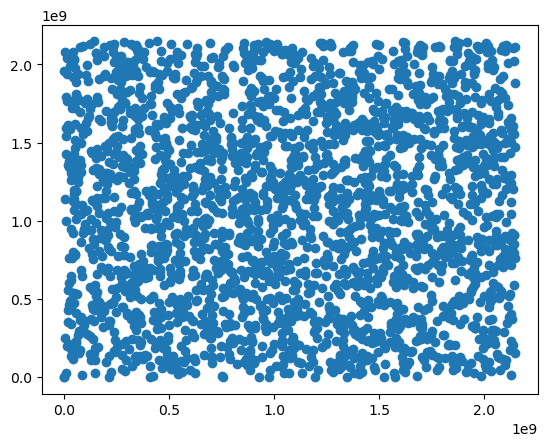

In [37]:
plt.scatter(randu[:,0],randu[:,1])